In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("gym_churn_clean.csv")
df.head()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_aditional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


Agregar columna de diferencia de promedio y frecuencia del ultimo mes y otra de cargos promedio por mes de permnencia, estas frecuencias ayudarán a que pueda haber una mejor predicción 

In [26]:
df["freq_drop"] = df["avg_class_freq_total"] - df["avg_class_freq_current_month"]

df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_aditional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn,freq_drop
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,0.020398
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0.012693
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,0.122596
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,-0.151582
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,-0.006194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0,-0.064572
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1,0.984309
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0,-0.045293
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0,0.033872


In [27]:
df["monthly_extra_charge"] = df["avg_aditional_charges_total"] / df["lifetime"].replace(0, 1)
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_aditional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn,freq_drop,monthly_extra_charge
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,0.020398,4.742490
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0.012693,16.171848
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,0.122596,64.724240
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,-0.151582,31.334932
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,-0.006194,66.120755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0,-0.064572,0.300753
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1,0.984309,68.883764
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0,-0.045293,39.125271
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0,0.033872,20.637552


In [28]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_aditional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn,freq_drop,monthly_extra_charge
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250,0.111968,71.908206
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521,0.321350,73.970838
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,-1.060218,0.035944
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,-0.056744,19.149330
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000,0.022433,46.298186
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,0.141110,100.312150
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,1.856764,552.590740


Resumen inicial: Cantidad de clientes: 

-4000 registros analizados.

-Tasa de cancelación (churn): Aproximadamente 27% de los clientes cancelaron su membresía.

-51% son mujeres.

-85% viven cerca del gimnasio.

-49% tienen pareja.

-31% usaron promociones de amigos.

-90% proporcionaron teléfono.

-41% participan en visitas grupales.

-Edad: Promedio de 29 años, con rango de 18 a 41 años, indicando una clientela mayormente joven-adulta.

-Promedio total: 1.88 clases/mes.

-Promedio último mes: 1.77 clases/mes.

-Diferencia promedio (freq_drop): 0.11, indicando una ligera reducción en la asistencia reciente.

-Existen cargos adicionales:
Promedio total: $147 con alta variabilidad.

Cargos promedio mensuales (monthly_extra_charge): $72 en promedio, con algunos clientes con gastos muy altos.

-Duración del contrato: Promedio de casi 5 meses, con un rango de 1 a 12 meses.

-Duración como cliente (lifetime): Promedio 3.7 meses, con valores hasta 31 meses.

In [29]:
#Comparación entre los clientes que se quedaron y los que cancelaron 
df.groupby("churn").mean(numeric_only=True)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_aditional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,freq_drop,monthly_extra_charge
churn,,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,-0.003006,61.603178
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,0.430449,100.453428


En esta comparación se puede deducir que los clientes más jóvenes, con contratos cortos, poca antiguedad y que han reducido su frecuencia de clases son mucho más propensos a cancelar. También se notan otros factores como lo son ir con más personas como una influencia positiva (motivación).

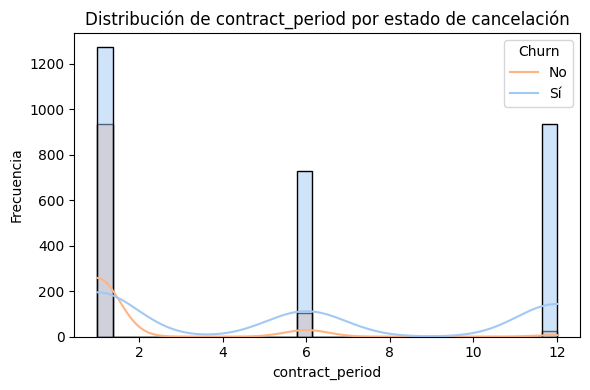

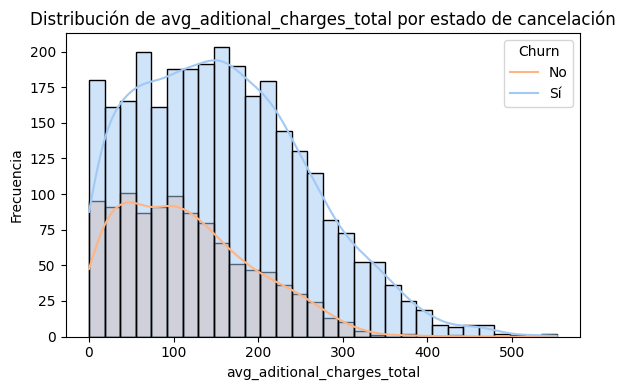

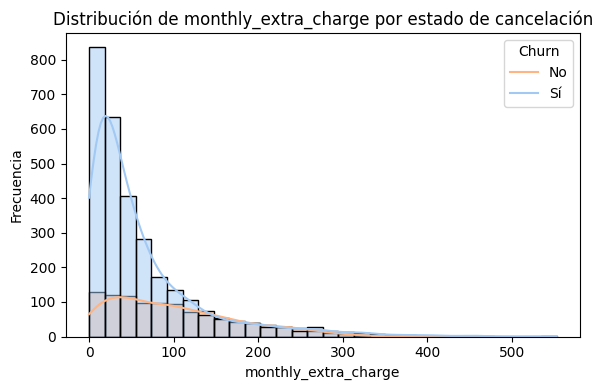

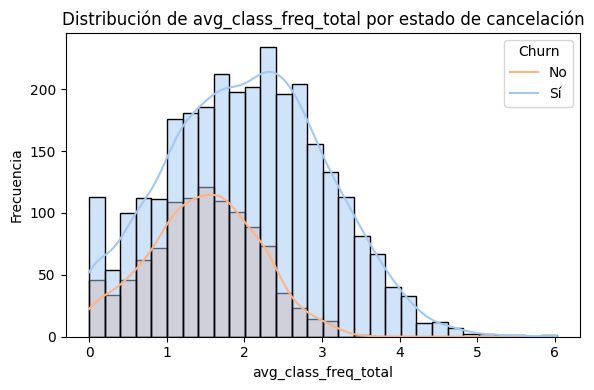

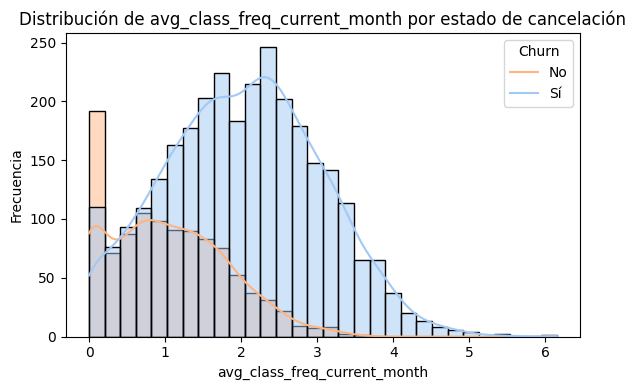

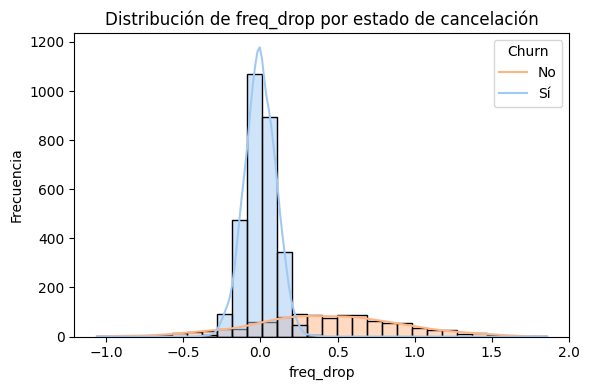

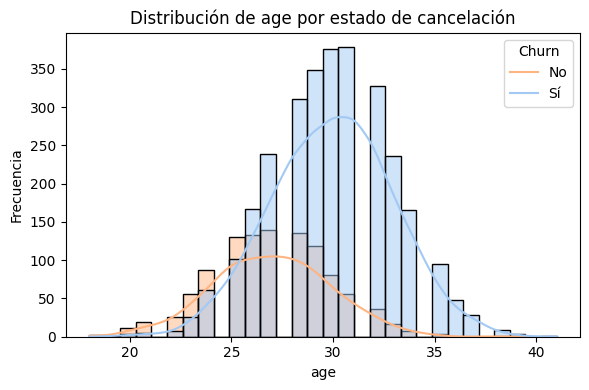

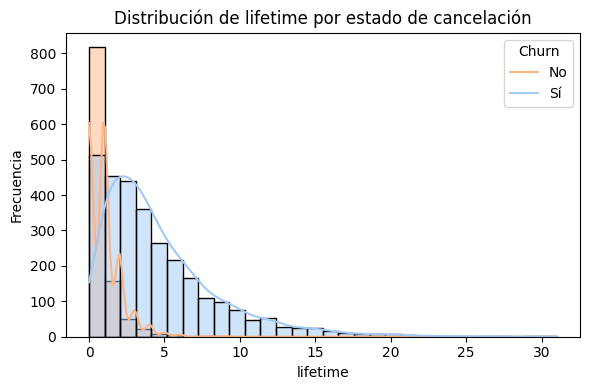

In [31]:
features = [
    "contract_period",               
    "avg_aditional_charges_total",  
    "monthly_extra_charge",
    "avg_class_freq_total",          
    "avg_class_freq_current_month",  
    "freq_drop",
    "age",
    "lifetime"                       
]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="churn", kde=True, bins=30, palette="pastel")
    plt.title(f"Distribución de {feature} por estado de cancelación")
    plt.xlabel(feature)
    plt.ylabel("Frecuencia")
    plt.legend(title="Churn", labels=["No", "Sí"])
    plt.tight_layout()
    plt.show()